# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
!pip install wandb
# !pip3 install pytorch_lightning torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 31.4 MB/s 
     |████████████████████████████████| 182 kB 63.3 MB/s 
     |████████████████████████████████| 166 kB 69.9 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 166 kB 60.1 MB/s 
     |████████████████████████████████| 162 kB 69.3 MB/s 
     |████████████████████████████████| 162 kB 73.9 MB/s 
     |████████████████████████████████| 158 kB 73.8 MB/s 
     |████████████████████████████████| 157 kB 73.8 MB/s 
     |████████████████████████████████| 157 kB 51.4 MB/s 
     |████████████████████████████████| 157 kB 73.1 MB/s 
     |████████████████████████████████| 157 kB 75.0 MB/s 
     |████████████████████████████████| 157 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 61.6 MB/s 
     |████████████████████████████████| 157 kB 76.4 MB/s 
     |███████████████████████████

In [3]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 796 kB 34.1 MB/s 
     |████████████████████████████████| 529 kB 67.5 MB/s 
     |████████████████████████████████| 136 kB 70.1 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=9490d870e0b5f4453760ea14e10157a497a03e75385ad64f2aa8f2cde66ebbb1
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [5]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torchvision.transforms import Compose, Normalize, Resize, ToTensor

# You may add any imports you need

In [6]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [7]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-04 17:54:25--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-04 17:54:25--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0549d795e7f504687f9bd8e02a.dl.dropboxusercontent.com/cd/0/get/BwKB0eH6W2w9cLGVNeybf5OTdyLKNoGx6Nc8dm-WHvwdA96QU5sWNU7PWNeljTwAhI9a6JP0dT4DjHXAdfP01VrzIOznb1_64gvKJoxjW1a1qXPLM-_rPq1xelzWaKZpTkirSSGzjiui839d089nD4ZpgDHqM2QeisChnNlV6npWQQ/file?dl=1# [following]
--2022-11-04 17:54:26--  https://uc0549d795e7f504687f9bd8e02a.dl.dropboxusercontent.com/cd/0/get/BwKB0eH6W2w9cLGVNeybf5OTdyLKNoGx6Nc8dm-WHvwdA96QU5sWNU7PWNeljTwAhI9a6JP0dT4DjH

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = Compose(
        [   
            transforms.RandomRotation(degrees=15),
            transforms.RandomVerticalFlip(),
            transforms.RandomHorizontalFlip(),
            ToTensor(),
            Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), 
        ])
val_transform = Compose(
        [
            ToTensor(),
            Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), 
        ])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle = True) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=256) # YOUR CODE HERE

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

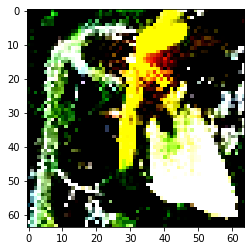

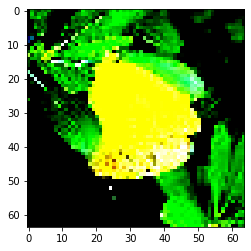

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
device = "cuda:0" if torch.cuda.is_available else "cpu"
device

'cuda:0'

In [ ]:
from torchvision.models import resnet18
from torchvision.models import densenet121

model = torchvision.models.densenet121(weights=None, num_classes=200).to(device)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Тренировочный класс lightning

In [7]:
class YourModule(pl.LightningModule):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()

        self.model = densenet121(pretrained=False, num_classes = 200).to(device)
        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        scheduler = torch.optim.lr_scheduler.ExponentialLR(self.optimizer, gamma = 0.975)
        return [self.optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("train_accuracy", acc, prog_bar=True)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
#!pip install wandb

In [ ]:
wandb_logger = WandbLogger(log_model='all', project="hw2_task1", name='densenet121') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = YourModule().to(device) # YOUR CODE HERE
trainer = pl.Trainer(
    accelerator="gpu",
    max_epochs=20,
    logger=wandb_logger
)
trainer.fit(model, train_dataloader, val_dataloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loggers/wandb.py:388: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  "There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse"
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
INFO:pytorch_lightning.utilities.rank_zero:

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


### Валидация результатов задания

In [15]:
from sklearn.metrics import accuracy_score


def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader, position=0, leave=True):
            images, labels = images.to(device), labels.to(device)

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#torch.save(model.state_dict(), "/content/drive/MyDrive/models/model_1_weights.pth")

In [ ]:
run = wandb.init(project="hw2_task1")
artifact = wandb.Artifact("model_1", type="model")
artifact.add_file("/content/drive/MyDrive/models/model_1_weights.pth")
run.log_artifact(artifact)
run.finish()

accuracy,▁▃▄▅▅▆▇▇▇▇▇████
epoch,▁▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_accuracy,▁▁▁▂▃▃▂▃▃▄▄▄▄▄▅▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▆▆▆▆▇▇▇▇██
train_loss,██▇▇▆▆▆▆▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▅▄▃▂▂▁▁▁▁▁▁▁▁
accuracy,0.4403
epoch,15
train_accuracy,0.69922
train_loss,1.07505
trainer/global_step,5899


In [ ]:
saved_model = YourModule()
saved_model.load_state_dict(torch.load("/content/drive/MyDrive/models/model_1_weights.pth"))

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
final_accuracy = evaluate_task(saved_model, val_dataloader)
print(f"\n Оценка за это задание составит {np.clip(10 * final_accuracy / 0.44, 0, 10):.2f} баллов \n accuracy: {final_accuracy}")

100%|██████████| 40/40 [00:07<00:00,  5.05it/s]


 Оценка за это задание составит 9.91 баллов 
 accuracy: 0.4362


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [9]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = Compose(
        [
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            ToTensor(),
            Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), 
        ])
val_transform = Compose(
        [
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            ToTensor(),
            Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), 
        ])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle = True) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=64) # YOUR CODE HERE

In [12]:
from torchvision.models import resnet152, ResNet152_Weights
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights

model = resnet152(pretrained=True)
model

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Тренировочный класс lightning

In [10]:
for param in model.parameters():
  param.requires_grad = False

model.fc = nn.Linear(2048, 200)

params_to_update = []
for name,param in model.named_parameters():
  if "layer4.2" in name:
    param.requires_grad = True
  if param.requires_grad == True:
    params_to_update.append(param)
    print(name)

layer4.2.conv1.weight
layer4.2.bn1.weight
layer4.2.bn1.bias
layer4.2.conv2.weight
layer4.2.bn2.weight
layer4.2.bn2.bias
layer4.2.conv3.weight
layer4.2.bn3.weight
layer4.2.bn3.bias
fc.weight
fc.bias


In [10]:
class YourModule2(pl.LightningModule):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()
        self.model = resnet152(weights=ResNet152_Weights.IMAGENET1K_V2)
        #for param in self.model.parameters():
        #  param.requires_grad = False

        self.model.fc = nn.Linear(2048, 200)

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        scheduler = torch.optim.lr_scheduler.ExponentialLR(self.optimizer, gamma = 0.975)
        return [self.optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("train_accuracy", acc, prog_bar=True)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [15]:
torch.cuda.empty_cache()
wandb_logger = WandbLogger(log_model='all',project="hw2_task2", name = "resnet152_full")
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model2 = YourModule2().to(device) # YOUR CODE HERE
trainer2 = pl.Trainer(
    accelerator="gpu",
    max_epochs=20,
    logger = wandb_logger
)
trainer2.fit(model2, train_dataloader, val_dataloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loggers/wandb.py:388: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  "There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 58.6 M
1 | loss  | CrossEntropyLoss | 0     
-----

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


### Валидация результатов задания

In [18]:
torch.save(model2.state_dict(), "/content/drive/MyDrive/models/model_2_weights.pth")

In [22]:
run = wandb.init(project="hw2_task2")
artifact = wandb.Artifact("model_2", type="model")
artifact.add_file("/content/drive/MyDrive/models/model_2_weights.pth")
run.log_artifact(artifact)
run.finish()

accuracy,▁
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
train_accuracy,▁▃▄▆▇▅▇▆▇▇▇▆▇▆▆█▇▇▇▆▆▇▇▆▇▇▇▇▆▇██
train_loss,█▆▄▃▂▃▂▃▂▂▂▂▂▃▂▁▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇████
val_loss,▁
accuracy,0.7905
epoch,1
train_accuracy,0.90625
train_loss,0.34038
trainer/global_step,1599


In [21]:
saved_model_2 = YourModule2()
saved_model_2.load_state_dict(torch.load("/content/drive/MyDrive/models/model_2_weights.pth"))

final_accuracy_2 = evaluate_task(saved_model_2, val_dataloader)
print(f"\n Оценка за это задание составит {np.clip(10 * (final_accuracy_2 - 0.5) / 0.34, 0, 10):.2f} баллов \n accuracy: {final_accuracy_2}")

100%|██████████| 157/157 [01:20<00:00,  1.96it/s]


 Оценка за это задание составит 8.60 баллов 
 accuracy: 0.7923


In [14]:
# Попробуем дообучить нашу уже сохраненную модель
torch.cuda.empty_cache()
wandb_logger = WandbLogger(log_model='all',project="hw2_task2", name = "resnet152_full_2")
device = "cuda:0" if torch.cuda.is_available() else "cpu"

trainer2_2 = pl.Trainer(
    accelerator="gpu",
    max_epochs=20,
    logger = wandb_logger
)
trainer2_2.fit(saved_model_2, train_dataloader, val_dataloader)

wandb: Currently logged in as: aimoryou (aimoryou_team). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 58.6 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.6 M    Trainable params
0         Non-trainable params
58.6 M    Total params
234.214   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [17]:
final_accuracy_2_2 = evaluate_task(saved_model_2, val_dataloader)
print(f"\n Оценка за это задание составит {np.clip(10 * (final_accuracy_2_2 - 0.5) / 0.34, 0, 10):.2f} баллов \n accuracy: {final_accuracy_2_2}")

100%|██████████| 157/157 [01:20<00:00,  1.95it/s]


 Оценка за это задание составит 8.92 баллов 
 accuracy: 0.8032


In [18]:
torch.save(saved_model_2.state_dict(), "/content/drive/MyDrive/models/model_2_v2_weights.pth") # Вот и подъехала вторая версия модели со слегка улучшенным качеством

# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

К сожалению, не удалось добиться максимального качества ни на одном из заданий (( Но то, что получилось меня вполне устраивает, так как ни сил ни желания гнаться за десятыми балла не осталось. 
Итоги:                
1 задание -- 9.91 / 10 (https://wandb.ai/aimoryou_team/hw2_task1)    
2 задание -- 8.92 / 10 (https://wandb.ai/aimoryou_team/hw2_task2)

Сначала все конечно же началось с попыток собрать все, что нужно и сделать, чтобы это работало. Эти муки wandb передать не сможет, к сожалению, но как говорится: "Самый крутой программист тот, кто столкнулся со всеми видами ошибок в своей сфере". Потом у меня ничего не обучалось, то есть шло обучение, а аккураси был около 0 и совсем не рос на протяжении многих лет. Это можно заметить по первым графикам в вандб для задания 2. Однако оказалось, что просто не хватало shuffle = True. Рассказал, чтоб было над чем посметься (перепробовал просто все что возможно) ;)  

Далее **первое** задание оказалось совсем несложным, потому что оказалось так, что я много чего поробовал, когда ничего не обучалось - поменял шафл и запустил последнее что было densenet121 и все вышло, чуть не хватало - добавил аугментацию, шедулер и вуаля. 

Во **втором** же задании пробовал много мощных моделей вечно не хватало памяти менял батчи и тд, да и вообще супер долго все обучалось. Остановился на резнет152:          
    1) попробовал обучить последний слой -- мало     
    2) попробовал обучить еще и последний блок с батч нормами и свертками -- мало    
    3) Ну что ж бахаем всю модель - так сказать fine tunning - и вуаля одна эпоха и аккураси 0.79. Далее сразу остановил зафиксировал качество, сохранил модель куда только можно (вандб и диск). Но было решено попробовать еще эпоху сверху уже обученной модели - спустя час получилась вторая версия с акураси бОльшим на целую сотую! Мелочь, а приятно!

Ну а если вы дочитали до этого момента, то почему бы не поставить лайк и не подписаться - у нас много похожего контента. Ссылка в описани! Всем успехов, у меня все!

